In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
from random import randint

from sklearn.cluster import KMeans

This image is:  <class 'numpy.ndarray'> with dimensions:  (4032, 3024, 3)


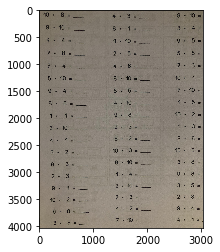

In [2]:
# Reading image
image = mpimg.imread('testImages/testImage1.jpg')

# Print image information and plot 
print('This image is: ', type(image), 'with dimensions: ', image.shape)
plt.imshow(image)

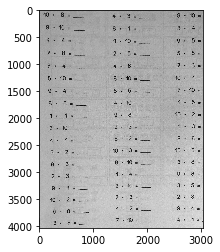

In [3]:
# Copy original image and apply grey scale
imageGrey = np.copy(image)
imageGrey = cv2.cvtColor(imageGrey, cv2.COLOR_RGB2GRAY)
plt.imshow(imageGrey, cmap='gray')

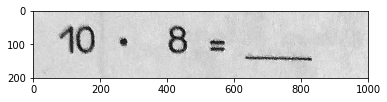

In [17]:
# Crop the image
length = 200
width = 1000
cropImg = imageGrey[0:length, 0:width]
plt.imshow(cropImg, cmap='gray')


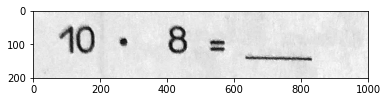

In [18]:
# Apply Gaussian Filtering
kernel_size = 5
gaussianFilteredImg = cv2.GaussianBlur(cropImg, (kernel_size, kernel_size), 0)
plt.imshow(gaussianFilteredImg, 'gray')

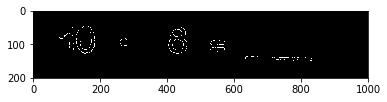

In [19]:
# Canny Image
low_threshold = 100
high_threshold = 200
cannyImg = cv2.Canny(gaussianFilteredImg, low_threshold, high_threshold)
plt.imshow(cannyImg, 'gray')

In [21]:
# Bring the above picuture into a clusterable format
pointList = []
for x in range(0, length): 
    for y in range(0, width):
        if cannyImg[x,y] > 0:
            pointList.append((x,y))
            
print("There are ", len(pointList), " equation points")
           
# Transform list into numpy Array
pointArray = np.array(pointList)     

There are  1726  equation points


In [25]:
k_means =  KMeans(init="k-means++", n_clusters=5, n_init=100)
k_means.fit(pointArray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# Create random color map based on number of clusters

colorMapList = []
for i in range(0, k_means.n_clusters):
    randomColor = [randint(0,255), randint(0,255), randint(0,255)]
    randomColor[i%3] = 0
    colorMapList.append(randomColor)

colorMapList    

[[0, 129, 197], [33, 0, 164], [38, 128, 0], [0, 95, 230], [54, 0, 225]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


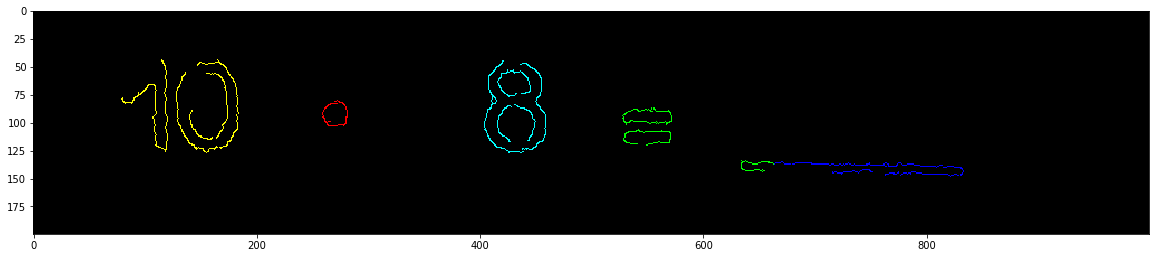

In [32]:
# Plot results   
# Color the Image
colorMapList = [[255,0,0], [0,255,0], [0,0,255], [255,255,0], [0,255,255]]
clusterImg = np.zeros((length,width,3))
clusterImg[:,:] = (0, 0, 0)
for idx, (x, y) in enumerate(pointList): 
    clusterImg[x,y] = colorMapList[k_means.labels_[idx]]

plt.figure(figsize=(20,5))
plt.imshow(clusterImg)


In [ ]:
# Alternatively, apply threshold on actual greyscale values in order to filter out empty spaces 
# (rather than relying on edge detection, i.e. the Canny filter)